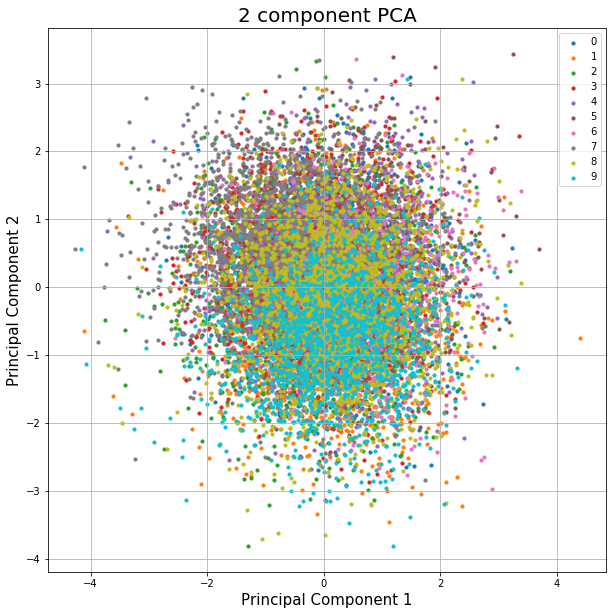

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
import numpy as np

txt = pd.read_csv('word_embedding.csv')
txt=txt.iloc[:,1:]

## 데이터 로딩 후 kmeasn로 군집화

x = StandardScaler().fit_transform(txt)



kmeans = KMeans(n_clusters=10, random_state=0).fit(x)

#10개의 군집 
lab =kmeans.labels_

## 원시 100차원 데이터로 시각화

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# 군집별로 scatter 그림면 이쁜 색으로 그려짐
for i in range(10):
    ax.scatter(x[lab==i,0]
            ,x[lab==i,1]
            , s = 10)

ax.legend(range(10))
ax.grid()

In [44]:
feat_cols=txt.columns


### pca & T-SNE 시각화

In [21]:
p_data=pd.DataFrame(lab)

In [22]:
p_data

,0
0,1
1,1
2,1
3,1
4,6
5,1
6,1
7,1
8,1
9,1


In [23]:
from sklearn.decomposition import PCA
#100차원을 2차원으로 축소!
#2개의 새로운 feature가 생김
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)
#2개만 뽑아옴. 
p_data['pca-one']= pca_result[:,0]
p_data['pca-two'] = pca_result[:,1]



print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principle component: [0.0556274  0.03896366]


In [24]:
p_data=np.array(p_data)

In [25]:
p_data

array([[ 1.        ,  5.29508701,  0.80840878],
       [ 1.        ,  5.69584883,  0.33583917],
       [ 1.        ,  5.46805557, -0.55303371],
       ...,
       [ 8.        , -3.68785625, -1.91600545],
       [ 8.        , -3.41678735,  0.76355982],
       [ 8.        , -3.16720724,  0.81858017]])

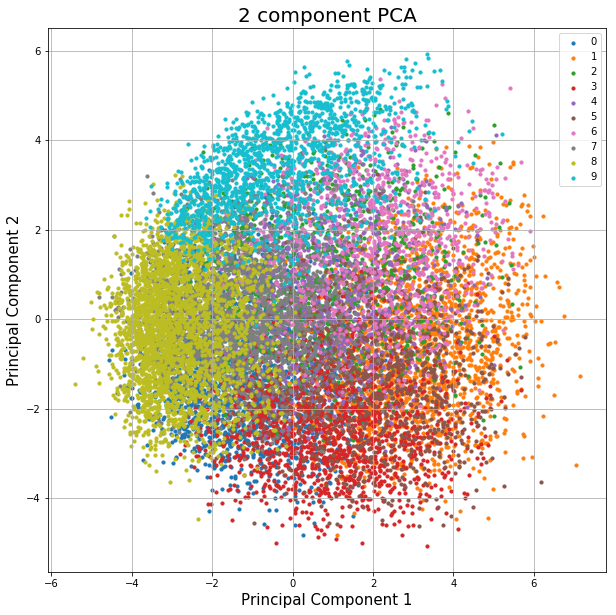

In [26]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# 주성분 별로, scatter 그림면 이쁜 색으로 그려짐
for i in range(10):

    ax.scatter(p_data[lab==i,1]
            ,p_data[lab==i,2]
            , s = 10)

ax.legend(range(10))
ax.grid()



In [49]:
import time
from sklearn.manifold import TSNE

# 사용할 데이터,, 너무 오래걸려서 조금만
# 랜덤 행 생성
rndperm = np.random.permutation(np.shape(x)[0])
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(txt.loc[rndperm[:n_sne],feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds',time.time() - time_start )

t-SNE done! Time elapsed: {} seconds 48.768715620040894


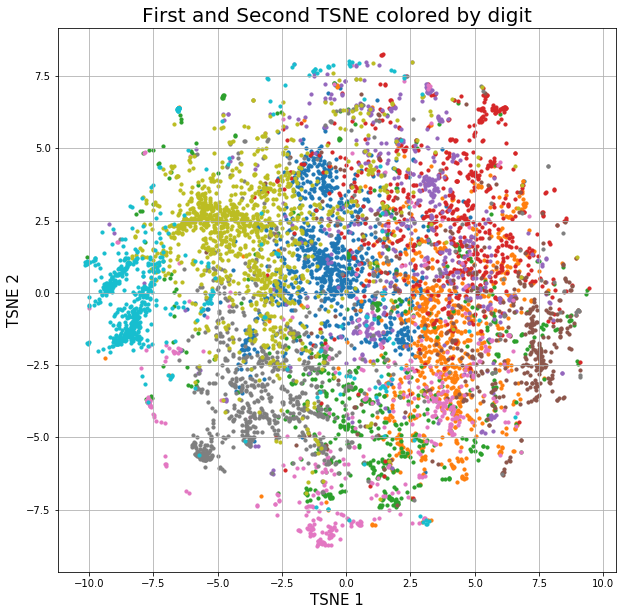

In [51]:
df_tsne = txt.loc[rndperm[:n_sne],:].copy() 
df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title("First and Second TSNE colored by digit", fontsize = 20)

xf = df_tsne['x-tsne']
yf = df_tsne['y-tsne']
for i in range(10):
    ax.scatter(xf[lab[rndperm[:n_sne]]==i],yf[lab[rndperm[:n_sne]]==i],s=10)
ax.grid()

확실히, 단순 PCA를 한 것 보다, 직관적으로 데이터 구조를 시각화 할 수 있는 T-SNE가 더 분명하게 데이터 구조가 더 분명하게 나타났다.